# Exercise 5

In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

You can use a Python code similar to the following one to observe how the sampled points distribute into the 3D space:

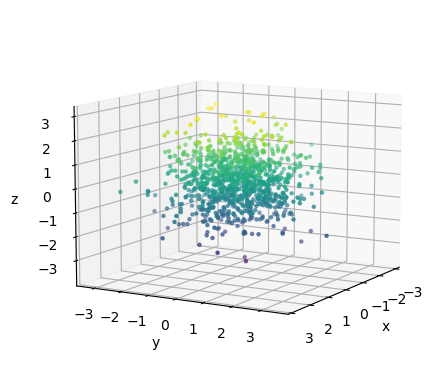

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=1000
X=np.random.normal(0.0,1.0,M)
Y=np.random.normal(0.0,1.0,M)
Z=np.random.normal(0.0,1.0,M)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

In [176]:
a0 = 0.0529 * 10**(-9)

## Introduction
The **Metropolis algorithm** is able of sampling a generic pdf with astonishing simplicity, including the square modulus of a wave function.
The implementation of the algorithm is straightforward and reduces to computing the acceptance rate $$A = \min {\left(1, \frac{T(y|X)p(x)}{T(x|y)p(y)}\right)} = A = \min {\left(1, \frac{p(x)}{p(y)}\right)}$$
if the transition probability $T(x|y)$ is simmetric. This highlights the importance of using a simmetric transition probability.

Firstly, I implemented the algorithm through a uniform transition probability with the new 3D position being: $\bar{x}_{new} = \bar{x}_{old} + c \cdot \bar{r}$ where $\bar{r}\in(-1,1)^3$ is a uniformly distributed rv and $c$ tunes the amplitude of the step and therefore the probability that the new position will be accepted.
Lastly, I implemented the Gaussian transition probability in a similar way, by updating the position such that: $\bar{x}_{new} = \bar{x}_{old} +\bar{r}$ where $\bar{r} \sim \mathcal{N}^{3}(0,c)$.

## Throws in each block

As we already discussed, the blocking average tecnique is pivotal for breaking correlations in the randomly generated numbers of our generator. Nevertheless, when working with Metropolis, one should be careful of not having blocks which are too wide, otherwise the algorithm will start exploring, thanks to a reasonable acceptance ration, configuration which are not very likely. While this may be beneficial for sampling the pdf in its entirety, it may result in larger deviations from our expected value. Therefore, thorugh empirical observation, I convenied that $L=10^3$ throws in each block may be a reasonable number to accomodate both remarks.

## Equilibration

Metropolis is usually quite fast in adapting to the pdf given a starting point despite the dependance of this adjustment time on the transition probability used and on the starting point. 
I tried to run a few tests to understand how many steps are necessary to equilibrate the system. All of the following simulations are carried out with $L=10^3$ throws in each of the $N=100$ blocks.a0 = 0.0529 * 10**(-9)

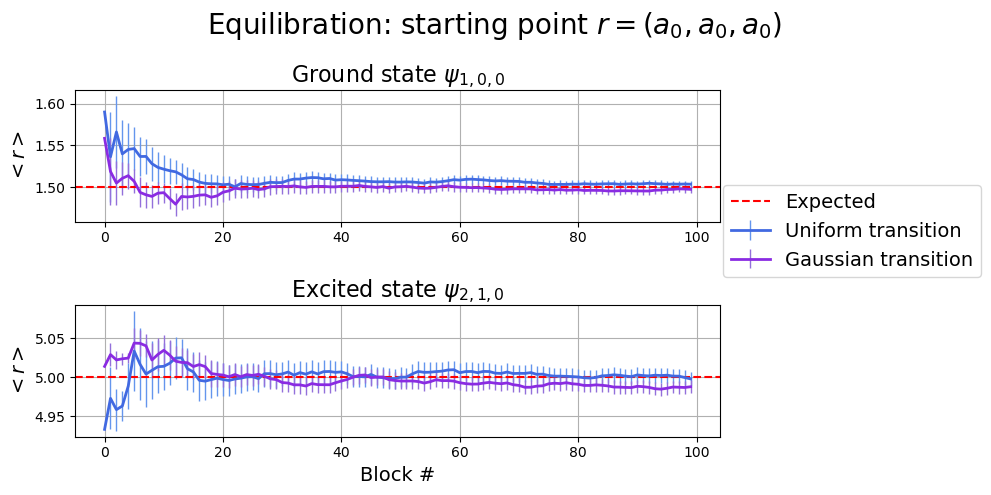

In [196]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Equilibration: starting point $r=(a_{0},a_{0},a_{0})$', fontsize=20)

plt.subplot(2,1,1)

radius = np.loadtxt('./5.1/1.0.0.averages.UniformNOEQ.txt', usecols=(0, 1, 2))
plt.errorbar(radius[:,0], radius[:,1]/a0, yerr=radius[:,2]/a0, c='royalblue',lw=2, elinewidth=1, ecolor='cornflowerblue', label='Uniform transition')
plt.grid()

radius = np.loadtxt('./5.1/1.0.0.averages.GaussNOEQ.txt', usecols=(0, 1, 2))
plt.errorbar(radius[:,0], radius[:,1]/a0, yerr=radius[:,2]/a0, c='blueviolet',lw=2, elinewidth=1, ecolor='mediumpurple', label='Gaussian transition')

plt.axhline(1.5, ls='--',c='red', label = "Expected")
plt.legend(bbox_to_anchor =(.99, .35), fontsize=14)
plt.title('Ground state $\psi_{1,0,0}$', fontsize=16)
plt.ylabel('$<r>$', fontsize=14)

plt.subplot(2,1,2)

radius = np.loadtxt('./5.1/2.1.0.averages.UniformNOEQ.txt', usecols=(0, 1, 2))
plt.errorbar(radius[:,0], radius[:,1]/a0, yerr=radius[:,2]/a0, c='royalblue',lw=2, elinewidth=1, ecolor='cornflowerblue')
plt.grid()

radius = np.loadtxt('./5.1/2.1.0.averages.GaussNOEQ.txt', usecols=(0, 1, 2))
plt.errorbar(radius[:,0], radius[:,1]/a0, yerr=radius[:,2]/a0, c='blueviolet',lw=2, elinewidth=1, ecolor='mediumpurple')

plt.axhline(5, ls='--',c='red')
plt.title('Excited state $\psi_{2,1,0}$', fontsize=16)
plt.ylabel('$<r>$', fontsize=14)
plt.xlabel('Block #', fontsize=14)
plt.tight_layout()
plt.show()


Then I decided to try with a **far starting point**, namely $$\bar{r} = (100a_{0}, 100a_{0}, 100a_{0}) $$

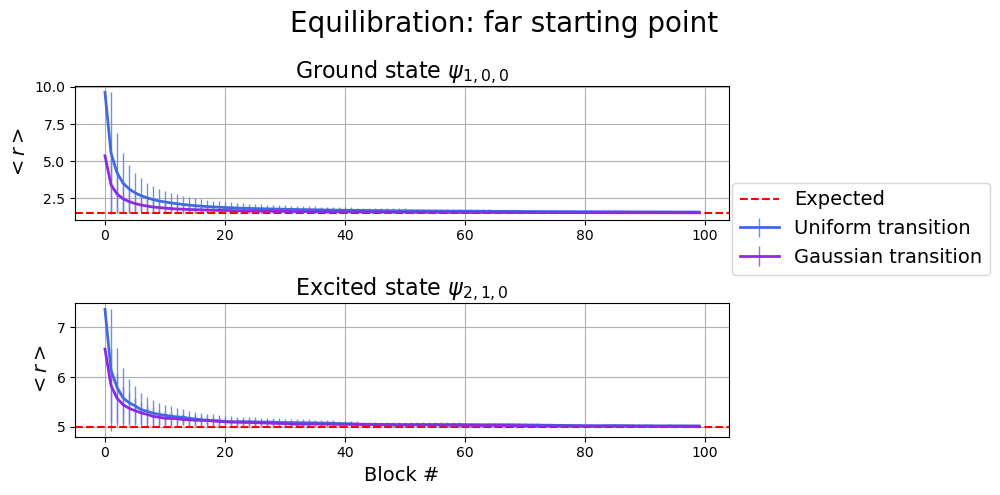

In [197]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Equilibration: far starting point', fontsize=20)

plt.subplot(2,1,1)

radius = np.loadtxt('./5.1/1.0.0.averages.UniformNOEQFAR.txt', usecols=(0, 1, 2))
plt.errorbar(radius[:,0], radius[:,1]/a0, yerr=radius[:,2]/a0, c='royalblue',lw=2, elinewidth=1, ecolor='cornflowerblue', label='Uniform transition')
plt.grid()

radius = np.loadtxt('./5.1/1.0.0.averages.GaussNOEQFAR.txt', usecols=(0, 1, 2))
plt.errorbar(radius[:,0], radius[:,1]/a0, yerr=radius[:,2]/a0, c='blueviolet',lw=2, elinewidth=1, ecolor='mediumpurple', label='Gaussian transition')

plt.axhline(1.5, ls='--',c='red', label = "Expected")
plt.legend(bbox_to_anchor =(.99, .35), fontsize=14)
plt.title('Ground state $\psi_{1,0,0}$', fontsize=16)
plt.ylabel('$<r>$', fontsize=14)

plt.subplot(2,1,2)

radius = np.loadtxt('./5.1/2.1.0.averages.UniformNOEQFAR.txt', usecols=(0, 1, 2))
plt.errorbar(radius[:,0], radius[:,1]/a0, yerr=radius[:,2]/a0, c='royalblue',lw=2, elinewidth=1, ecolor='cornflowerblue')
plt.grid()

radius = np.loadtxt('./5.1/2.1.0.averages.GaussNOEQFAR.txt', usecols=(0, 1, 2))
plt.errorbar(radius[:,0], radius[:,1]/a0, yerr=radius[:,2]/a0, c='blueviolet',lw=2, elinewidth=1, ecolor='mediumpurple')

plt.axhline(5, ls='--',c='red')
plt.title('Excited state $\psi_{2,1,0}$', fontsize=16)
plt.ylabel('$<r>$', fontsize=14)
plt.xlabel('Block #', fontsize=14)
plt.tight_layout()
plt.show()

Which clearly shows how slower the convergence is.
Therefore, I decided to start from the bohr radius and to build an `Equilibration()` function which makes the system evolve without measuring its properties for  $N = 20$ blocks of $L = 10^3$ throws:
```cpp
void EquilibrateUN(int nblocks,int L, vec &initialPositions, Functions *f, Random *rnd, double c) {
    double accepted = 0.;
    double attempted = 0.;
    for (int j =0; j < nblocks; j++){ 
        for (int i = 0; i < L; i ++){
            MetropolisUniform(initialPositions, f, rnd, c, accepted, attempted);
        }
    }
}

void EquilibrateGA(int nblocks,int L, vec &initialPositions, Functions *f, Random *rnd, double c) {
    ...
            MetropolisGauss(initialPositions, f, rnd, c, accepted, attempted);
    ...
}
```

## Results

The following simulations are carried out with an equilibration as explained before, a close starting point $\bar{r} = (a_{0}, a_{0}, a_{0})$ and $N=1000$ blocks with $L=10^3$ throws.

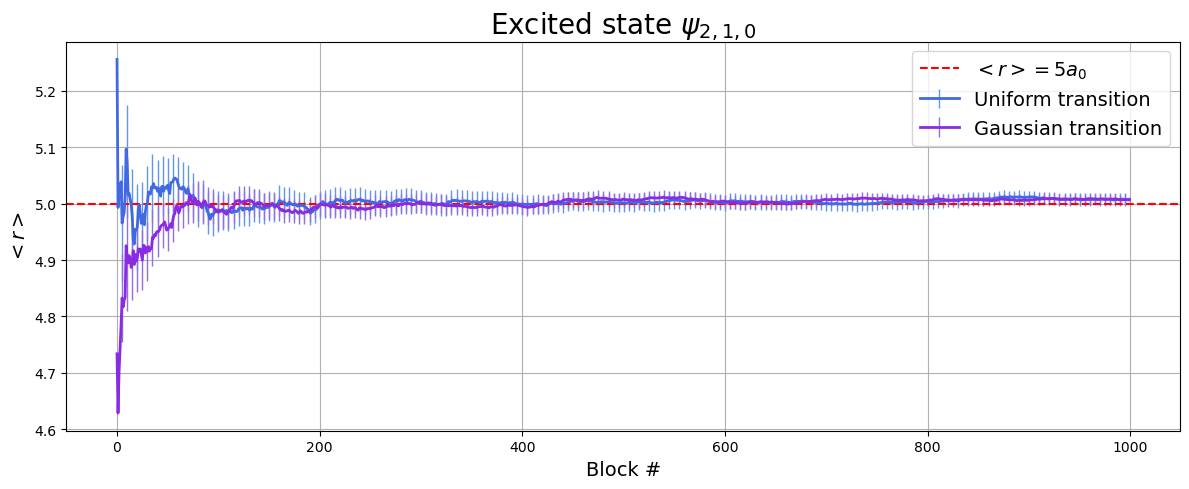

In [195]:
plt.figure(figsize=(12,5))

radius = np.loadtxt('./5.1/2.1.0.averages.Uniform.txt', usecols=(0, 1, 2))
plt.errorbar(radius[:,0], radius[:,1]/a0, yerr=radius[:,2]/a0, c='royalblue', errorevery=5,lw=2, elinewidth=1, ecolor='cornflowerblue', label='Uniform transition')
plt.grid()

radius = np.loadtxt('./5.1/2.1.0.averages.Gauss.txt', usecols=(0, 1, 2))
plt.errorbar(radius[:,0], radius[:,1]/a0, yerr=radius[:,2]/a0, c='blueviolet',errorevery=5,lw=2, elinewidth=1, ecolor='mediumpurple', label='Gaussian transition')

plt.axhline(5, ls='--',c='red', label = "$<r>=5a_{0}$")
plt.legend(fontsize=14)
plt.title('Excited state $\psi_{2,1,0}$', fontsize=20)
plt.ylabel('$<r>$', fontsize=14)
plt.xlabel('Block #', fontsize=14)
plt.tight_layout()
plt.show()


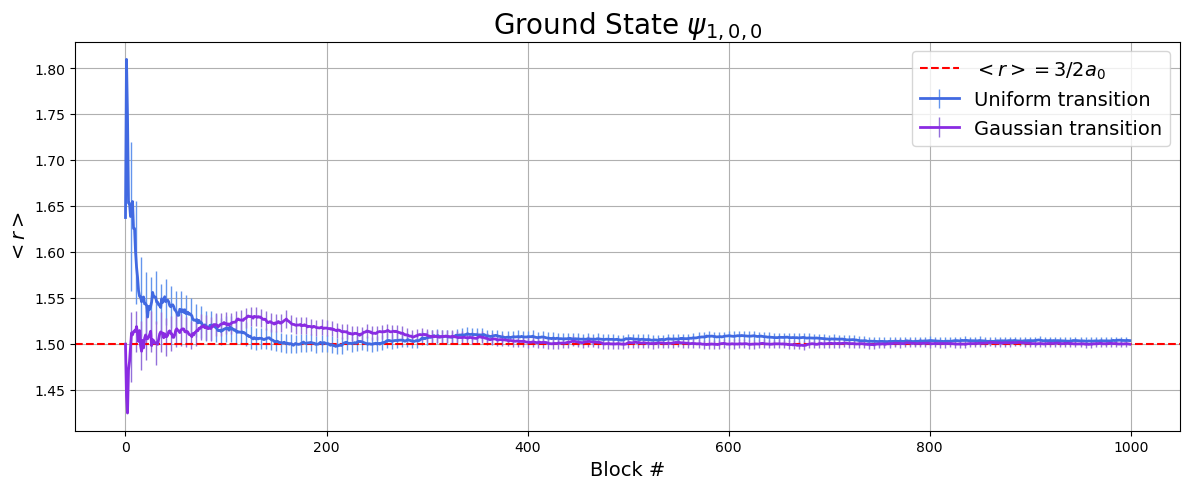

In [198]:
plt.figure(figsize=(12,5))

radius = np.loadtxt('./5.1/1.0.0.averages.Uniform.txt', usecols=(0, 1, 2))
plt.errorbar(radius[:,0], radius[:,1]/a0, yerr=radius[:,2]/a0, c='royalblue',lw=2, errorevery=5, elinewidth=1, ecolor='cornflowerblue', label='Uniform transition')
plt.grid()

radius = np.loadtxt('./5.1/1.0.0.averages.Gauss.txt', usecols=(0, 1, 2))
plt.errorbar(radius[:,0], radius[:,1]/a0, yerr=radius[:,2]/a0, c='blueviolet',lw=2, errorevery=5, elinewidth=1, ecolor='mediumpurple', label='Gaussian transition')


plt.axhline(1.5, ls='--',c='red', label = "$<r>=3/2a_{0}$")
plt.legend(fontsize=14)
plt.title('Ground State $\psi_{1,0,0}$', fontsize=20)
plt.ylabel('$<r>$', fontsize=14)
plt.xlabel('Block #', fontsize=14)
plt.tight_layout()
plt.show()

As clear from the plots, the algorithm produces results which are within a $\sigma$ right after 200 blocks with both transition probabilities. 

In addition, it could be useful to visualize the positions sampled through metropolis via a 3D plot:

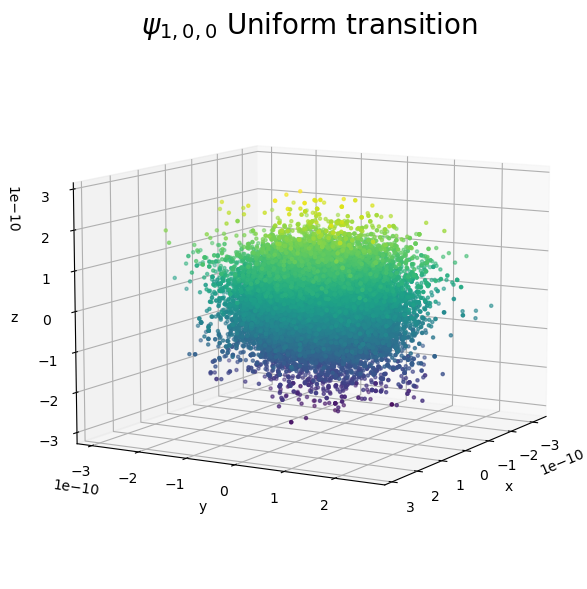

In [142]:
fig = plt.figure(figsize=(8,6))

pos = np.loadtxt('./5.1/100UniformCoo.txt', usecols = (0,1,2))

ax = fig.add_subplot(projection='3d')
ax.scatter(pos[:,0], pos[:,1], pos[:,2], c=pos[:,2], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title('$\psi_{1,0,0}$ Uniform transition', fontsize = 20)
plt.tight_layout()

plt.show()

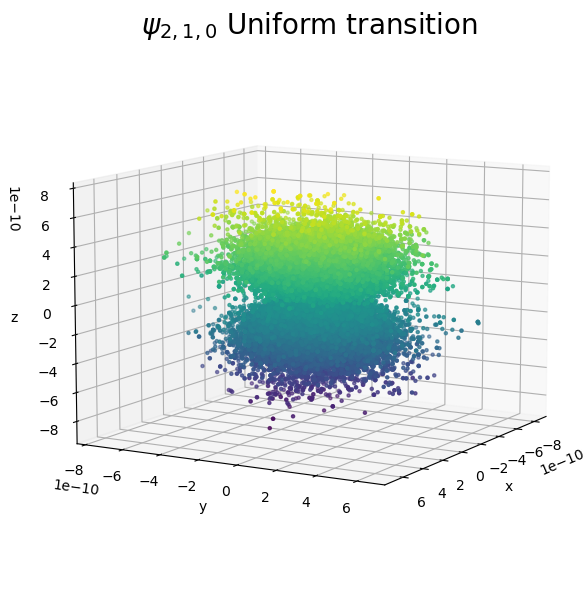

In [146]:
fig = plt.figure(figsize=(8,6))

pos = np.loadtxt('./5.1/210UniformCoo.txt', usecols = (0,1,2))

ax = fig.add_subplot(projection='3d')
ax.scatter(pos[:,0], pos[:,1], pos[:,2], c=pos[:,2], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title('$\psi_{2,1,0}$ Uniform transition', fontsize = 20)
plt.tight_layout()

plt.show()

As expected, we see appearing the characteristic shapes of the hydrogen atom orbitals.
